# Predicción del precio de una acción: Ecopetrol

In [1]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [37]:
#[100:385]
df = pandas.read_csv("EC.csv")
Close =df['Close'][100:385].reset_index(drop=True)


In [39]:
Close

0      16.340000
1      15.850000
2      16.250000
3      15.980000
4      16.879999
         ...    
280    28.340000
281    28.139999
282    27.959999
283    27.920000
284    27.900000
Name: Close, Length: 285, dtype: float64

## Metolodogía de Box Jenkins

### 1. Decidir acerca de la transformación de la serie para que sea estacionaria

a. Hacer la gráfica de la serie

b. Analizar los correlogramas (función de autocorrelación y función de autocorrelación parcial)

c. Test de Dicky-Fuller

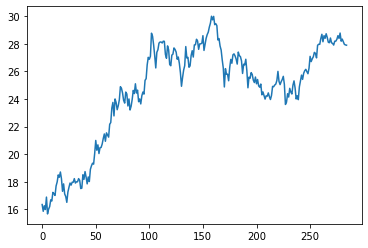

In [40]:
plt.plot(Close)

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


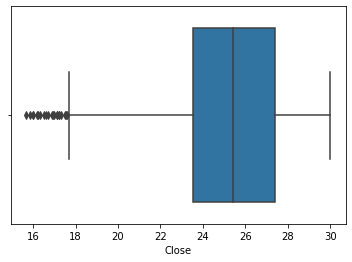

In [41]:
import seaborn as sns

sns.boxplot(Close)

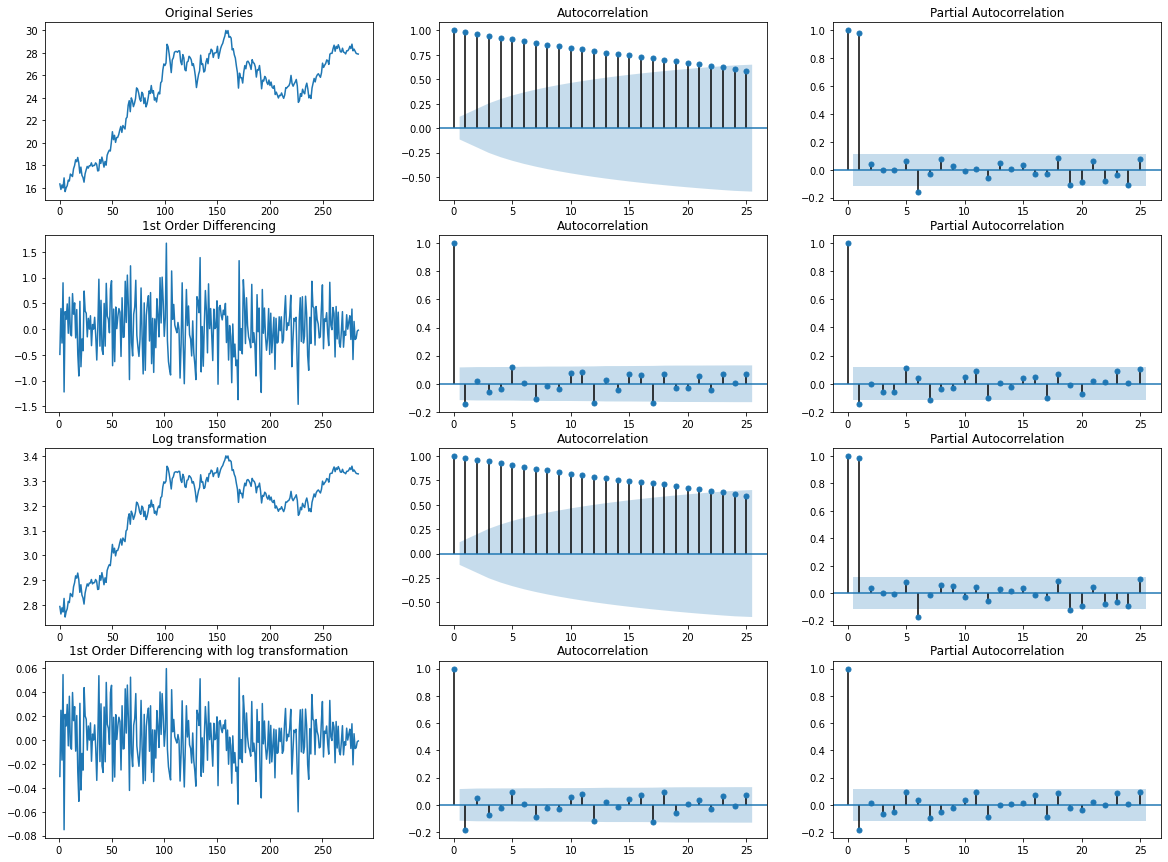

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(4,3, figsize=(20, 15))
#fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(Close); axes[0, 0].set_title('Original Series')
plot_acf(Close, ax=axes[0, 1])
plot_pacf(Close, ax=axes[0, 2])

axes[1, 0].plot(Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(Close.diff().dropna(), ax=axes[1, 1])
plot_pacf(Close.diff().dropna(), ax=axes[1, 2])


axes[2, 0].plot(np.log(Close)); axes[2, 0].set_title('Log transformation')
plot_acf(np.log(Close).dropna(), ax=axes[2, 1])
plot_pacf(np.log(Close).dropna(), ax=axes[2, 2])

axes[3, 0].plot(np.log(Close).diff()); axes[3, 0].set_title('1st Order Differencing with log transformation')
plot_acf(np.log(Close).diff().dropna(), ax=axes[3, 1])
plot_pacf(np.log(Close).diff().dropna(), ax=axes[3, 2])

plt.show()


In [43]:
from pmdarima.arima.utils import ndiffs
print(ndiffs(Close, test='adf'))

1


In [7]:
# diffClose=Close.diff()
# print(ndiffs(Close[1:] , test='adf'))

1


In [8]:
logClose = np.log(Close)
print(ndiffs(logClose[1:] , test='adf'))

1


### 2. Decidir el modelo ARIMA que mejor se ajusta a las autocorrelaciones encontradas

### 3. Estimar los parámetros

In [44]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(Close, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  285
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -218.208
Date:                Mon, 10 May 2021   AIC                            440.415
Time:                        20:47:51   BIC                            447.713
Sample:                             0   HQIC                           443.341
                                - 285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1390      0.059     -2.350      0.019      -0.255      -0.023
sigma2         0.2722      0.022     12.212      0.000       0.228       0.316
Ljung-Box (L1) (Q):                   0.02   Jarque-

### 4. Obtener los residuos y validar que sean ruido blanco

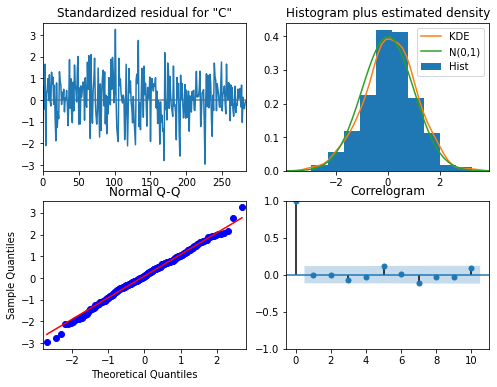

In [45]:
model_fit.plot_diagnostics(figsize=(8, 6))
plt.show()

### 5. Realizar el pronóstico

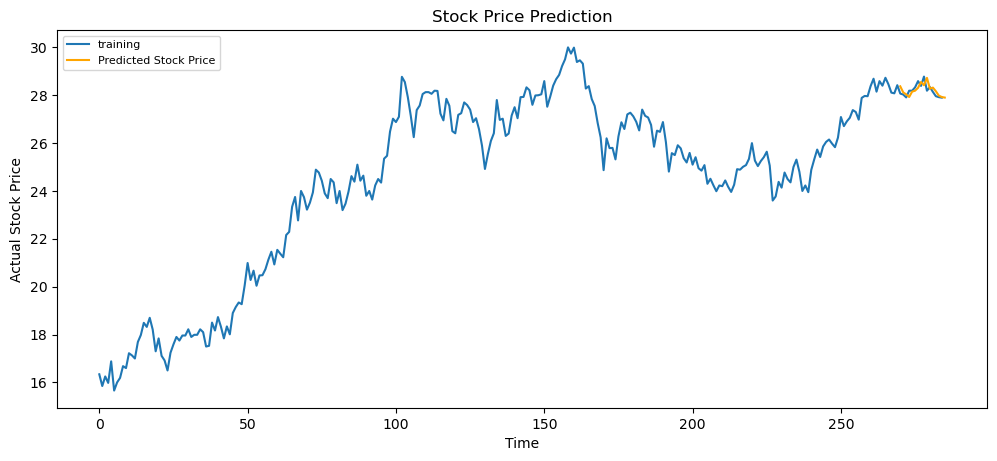

In [46]:
# in-sample prediction
# [3100:3150] 

import pandas as pd 
#model_fit.forecast(steps=100)
fc = model_fit.predict(start=270,end=285)  # 95% confidence
fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Close , label='training')
# plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [47]:
# report performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
test_data = Close[269:285] 

mse = mean_squared_error, (test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: (<function mean_squared_error at 0x0000024940D37158>, (269    28.420000
270    28.070000
271    28.030001
272    27.910000
273    28.190001
274    28.190001
275    28.330000
276    28.590000
277    28.389999
278    28.780001
279    28.190001
280    28.340000
281    28.139999
282    27.959999
283    27.920000
284    27.900000
Name: Close, dtype: float64, 270    28.372750
271    28.118640
272    28.035560
273    27.926677
274    28.151089
275    28.190001
276    28.310544
277    28.553868
278    28.417793
279    28.725802
280    28.271994
281    28.319155
282    28.167793
283    27.985014
284    27.925559
285    27.902779
Name: predicted_mean, dtype: float64))
MAE: 0.02866270674266924
RMSE: 0.03571575935266561
MAPE: 0.006712749189290331
